# Word2Vec

In [1]:
import time
import numpy as np
import tensorflow as tf
import utils
from random import randint

Load the [text8 dataset](http://mattmahoney.net/dc/textdata.html), a file of cleaned up Wikipedia articles from Matt Mahoney. The next cell will download the data set to the `data` folder. Then you can extract it and delete the archive file to save storage space.

### Load the dataset

In [2]:
with open('data/text8') as f:
    text = f.read()

### Preprocessing

In [3]:
words = utils.preprocess(text)
print(words[:30])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst']


In [4]:
# Shape
print("Total words: {}".format(len(words)))
print("Unique words: {}".format(len(set(words))))

Total words: 16680599
Unique words: 63641


### Create lookup table

A look table will contain index for each word to convert word into index and index converted into word

In [5]:
vocab_to_int, int_to_vocab = utils.create_lookup_tables(words)
int_words = [vocab_to_int[word] for word in words]

In [6]:
vocab_to_int

{'bannerman': 45183,
 'spondees': 58112,
 'undemocratic': 25993,
 'fireballs': 32814,
 'epsom': 47134,
 'charset': 31892,
 'circumcise': 37430,
 'involve': 3312,
 'daimyo': 44612,
 'rejectionist': 53722,
 'phosphor': 23641,
 'rebuttal': 22153,
 'substrate': 9081,
 'hoo': 38934,
 'switches': 8599,
 'valentino': 34947,
 'iguanas': 53724,
 'prosecutes': 58805,
 'slim': 11577,
 'dic': 53725,
 'daemen': 47135,
 'truscott': 58113,
 'riskin': 54692,
 'presses': 13042,
 'txt': 22892,
 'holtz': 56673,
 'generalizes': 27957,
 'owe': 13794,
 'seducing': 53779,
 'interrogation': 15796,
 'mandeville': 48684,
 'congratulations': 44611,
 'gunmen': 29372,
 'gratification': 50096,
 'cozze': 58114,
 'manorialism': 50097,
 'pandemonium': 47136,
 'neopaganism': 26752,
 'focuses': 5690,
 'relativity': 3094,
 'creditor': 40561,
 'coaches': 8572,
 'bulkier': 53726,
 'daumier': 50098,
 'hybrids': 16820,
 'oxidative': 21148,
 'stadia': 30965,
 'robes': 20153,
 'enne': 53727,
 'handedly': 28629,
 'subjection': 

In [7]:
int_to_vocab

{0: 'the',
 1: 'of',
 2: 'and',
 3: 'one',
 4: 'in',
 5: 'a',
 6: 'to',
 7: 'zero',
 8: 'nine',
 9: 'two',
 10: 'is',
 11: 'as',
 12: 'eight',
 13: 'for',
 14: 's',
 15: 'five',
 16: 'three',
 17: 'was',
 18: 'by',
 19: 'that',
 20: 'four',
 21: 'six',
 22: 'seven',
 23: 'with',
 24: 'on',
 25: 'are',
 26: 'it',
 27: 'from',
 28: 'or',
 29: 'his',
 30: 'an',
 31: 'be',
 32: 'this',
 33: 'which',
 34: 'at',
 35: 'he',
 36: 'also',
 37: 'not',
 38: 'have',
 39: 'were',
 40: 'has',
 41: 'but',
 42: 'other',
 43: 'their',
 44: 'its',
 45: 'first',
 46: 'they',
 47: 'some',
 48: 'had',
 49: 'all',
 50: 'more',
 51: 'most',
 52: 'can',
 53: 'been',
 54: 'such',
 55: 'many',
 56: 'who',
 57: 'new',
 58: 'used',
 59: 'there',
 60: 'after',
 61: 'when',
 62: 'into',
 63: 'american',
 64: 'time',
 65: 'these',
 66: 'only',
 67: 'see',
 68: 'may',
 69: 'than',
 70: 'world',
 71: 'i',
 72: 'b',
 73: 'would',
 74: 'd',
 75: 'no',
 76: 'however',
 77: 'between',
 78: 'about',
 79: 'over',
 80: 'year

In [8]:
int_words

[5237,
 3082,
 11,
 5,
 194,
 1,
 3133,
 45,
 58,
 155,
 127,
 741,
 476,
 10637,
 133,
 0,
 27482,
 1,
 0,
 102,
 854,
 2,
 0,
 15127,
 60576,
 1,
 0,
 150,
 854,
 3583,
 0,
 194,
 10,
 190,
 58,
 4,
 5,
 10767,
 214,
 6,
 1324,
 104,
 454,
 19,
 58,
 2731,
 362,
 6,
 3677,
 0,
 708,
 1,
 371,
 26,
 40,
 36,
 53,
 540,
 97,
 11,
 5,
 1424,
 2760,
 18,
 567,
 686,
 7091,
 0,
 247,
 5237,
 10,
 1052,
 27,
 0,
 320,
 248,
 46220,
 2879,
 792,
 186,
 5237,
 11,
 5,
 200,
 602,
 10,
 0,
 1135,
 19,
 2622,
 25,
 9016,
 2,
 279,
 31,
 4148,
 141,
 59,
 25,
 6437,
 4197,
 1,
 153,
 32,
 362,
 5237,
 36,
 1137,
 6,
 447,
 345,
 1818,
 19,
 4860,
 0,
 6764,
 1,
 7595,
 1774,
 566,
 0,
 93,
 0,
 247,
 11075,
 11,
 51,
 7091,
 89,
 26,
 270,
 37,
 5962,
 4866,
 20521,
 28,
 56215,
 41,
 317,
 5,
 25860,
 527,
 7595,
 371,
 4,
 258,
 1,
 153,
 25,
 1206,
 11,
 7595,
 200,
 1576,
 2,
 15266,
 332,
 1774,
 7091,
 4860,
 345,
 764,
 160,
 406,
 5697,
 755,
 1,
 4111,
 1131,
 4334,
 1536,
 2,
 567,
 8

## Subsampling

Words that show up often such as "the", "of", and "for" don't provide much context to the nearby words. If we discard some of them, we can remove some of the noise from our data and in return get faster training and better representations. This process is called subsampling by Mikolov. For each word $w_i$ in the training set, we'll discard it with probability given by 

$$ P(w_i) = 1 - \sqrt{\frac{t}{f(w_i)}} $$

where $t$ is a threshold parameter and $f(w_i)$ is the frequency of word $w_i$ in the total dataset.

I'm going to leave this up to you as an exercise. This is more of a programming challenge, than about deep learning specifically. But, being able to prepare your data for your network is an important skill to have. Check out my solution to see how I did it.


In [9]:
from collections import Counter
import random

threshold = 1e-5
number_of_words = len(int_words)
word_counter = Counter(int_words)
frequencies = dict()
drop_probabilities = dict()
train_words = []

droped_count = 0
for word,count in word_counter.items():
    frequency = count/number_of_words
    frequencies[word] = frequency
    drop_probabilities[word] = 1 - np.sqrt(threshold/frequency)
    
for word in int_words:
    if drop_probabilities[word] < 0.85:
        train_words.append(word)
        
print(len(train_words))

7852711


# Making the batch

Now that our data is in good shape, we need to get it into the proper form to pass it into our network. With the skip-gram architecture, for each word in the text, we want to grab all the words in a window around that word, with size $C$. 

From [Mikolov et al.](https://arxiv.org/pdf/1301.3781.pdf): 

"Since the more distant words are usually less related to the current word than those close to it, we give less weight to the distant words by sampling less from those words in our training examples... If we choose $C = 5$, for each training word we will select randomly a number $R$ in range $< 1; C >$, and then use $R$ words from history and $R$ words from the future of the current word as correct labels."

In [10]:
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    # Your code here
    random_count = randint(1,window_size) #the R number described in the description
    
    if idx - random_count < 0:
        start_word = 0
    else:
        start_word = idx - random_count
        
    if idx + random_count > len(words) - 1:
        end_word = len(words)  
    else:
        end_word = idx + random_count + 1
 
    return list(set(words[start_word:idx]+words[idx+1:end_word]))

# test
print(get_target([0,1,2,3,4,5,6,7,8,9],4,3)) #returns a list of the words around the given index

[2, 3, 5, 6]


Here's a function that returns batches for our network. The idea is that it grabs `batch_size` words from a words list. Then for each of those words, it gets the target words in the window. I haven't found a way to pass in a random number of target words and get it to work with the architecture, so I make one row per input-target pair. This is a generator function by the way, helps save memory.

In [11]:
def get_batches(words, batch_size, window_size=5):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y
    

# Building the graph

In [12]:
train_graph = tf.Graph()
with train_graph.as_default():
    inputs = tf.placeholder(tf.int32,shape=[None],name = "inputs")
    labels = tf.placeholder(tf.int32,shape = [None,1],name = "labels")

### Embedding
The embedding matrix has a size of the number of words by the number of units in the hidden layer. So, if you have 10,000 words and 300 hidden units, the matrix will have size $10,000 \times 300$. Remember that we're using tokenized data for our inputs, usually as integers, where the number of tokens is the number of words in our vocabulary.


Tensorflow provides a convenient function [`tf.nn.embedding_lookup`](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup) that does this lookup for us. You pass in the embedding matrix and a tensor of integers, then it returns rows in the matrix corresponding to those integers. Below, set the number of embedding features you'll use (200 is a good start), create the embedding matrix variable, and use `tf.nn.embedding_lookup` to get the embedding tensors. For the embedding matrix, I suggest you initialize it with a uniform random numbers between -1 and 1 using [tf.random_uniform](https://www.tensorflow.org/api_docs/python/tf/random_uniform).

In [13]:
n_vocab = len(int_to_vocab)
n_embedding = 300
with train_graph.as_default():
    embedding = tf.Variable(tf.random_uniform([n_vocab, n_embedding], -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs)

In [14]:
n_sampled = 100
with train_graph.as_default():
    softmax_w = tf.Variable(tf.truncated_normal([n_vocab, n_embedding], stddev=0.1), name='softmax_w')
    softmax_b = tf.Variable(tf.zeros([n_vocab]), name='softmax_b')
    
    # calculate the loss using negative sampleing
    loss = tf.nn.sampled_softmax_loss(softmax_w, softmax_b, labels, embed, n_sampled, n_vocab)
    
    cost = tf.reduce_mean(loss)
    optimizer = tf.train.AdamOptimizer().minimize(cost)

### Validation

In [15]:
with train_graph.as_default():
    ## From Thushan Ganegedara's implementation
    valid_size = 16 # Random set of words to evaluate similarity on.
    valid_window = 100
    # pick 8 samples from (0,100) and (1000,1100) each ranges. lower id implies more frequent 
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples, 
                               random.sample(range(1000,1000+valid_window), valid_size//2))

    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
    
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keep_dims=True))
    normalized_embedding = embedding / norm
    valid_embedding = tf.nn.embedding_lookup(normalized_embedding, valid_dataset)
    similarity = tf.matmul(valid_embedding, tf.transpose(normalized_embedding))

### Training the model

In [ ]:
epochs = 10
batch_size = 1000
window_size = 10

with train_graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=train_graph) as sess:
    iteration = 1
    loss = 0
    sess.run(tf.global_variables_initializer())

    for e in range(1, epochs+1):
        batches = get_batches(train_words, batch_size, window_size)
        start = time.time()
        for x, y in batches:
            
            feed = {inputs: x,
                    labels: np.array(y)[:, None]}
            train_loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            loss += train_loss
            
            if iteration % 100 == 0: 
                end = time.time()
                print("Epoch {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Avg. Training loss: {:.4f}".format(loss/100),
                      "{:.4f} sec/batch".format((end-start)/100))
                loss = 0
                start = time.time()
            
            if iteration % 1000 == 0:
                ## From Thushan Ganegedara's implementation
                # note that this is expensive (~20% slowdown if computed every 500 steps)
                sim = similarity.eval()
                for i in range(valid_size):
                    valid_word = int_to_vocab[valid_examples[i]]
                    top_k = 8 # number of nearest neighbors
                    nearest = (-sim[i, :]).argsort()[1:top_k+1]
                    log = 'Nearest to %s:' % valid_word
                    for k in range(top_k):
                        close_word = int_to_vocab[nearest[k]]
                        log = '%s %s,' % (log, close_word)
                    print(log)
            
            iteration += 1
    save_path = saver.save(sess, "checkpoints/text8.ckpt")
    embed_mat = sess.run(normalized_embedding)

In [16]:
with train_graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=train_graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    embed_mat = sess.run(embedding)

INFO:tensorflow:Restoring parameters from checkpoints\text8.ckpt


## Visualizing the word vectors

Below we'll use T-SNE to visualize how our high-dimensional word vectors cluster together. T-SNE is used to project these vectors into two dimensions while preserving local stucture. Check out [this post from Christopher Olah](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) to learn more about T-SNE and other ways to visualize high-dimensional data.

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

viz_words = 500
tsne = TSNE()
embed_tsne = tsne.fit_transform(embed_mat[:viz_words, :])

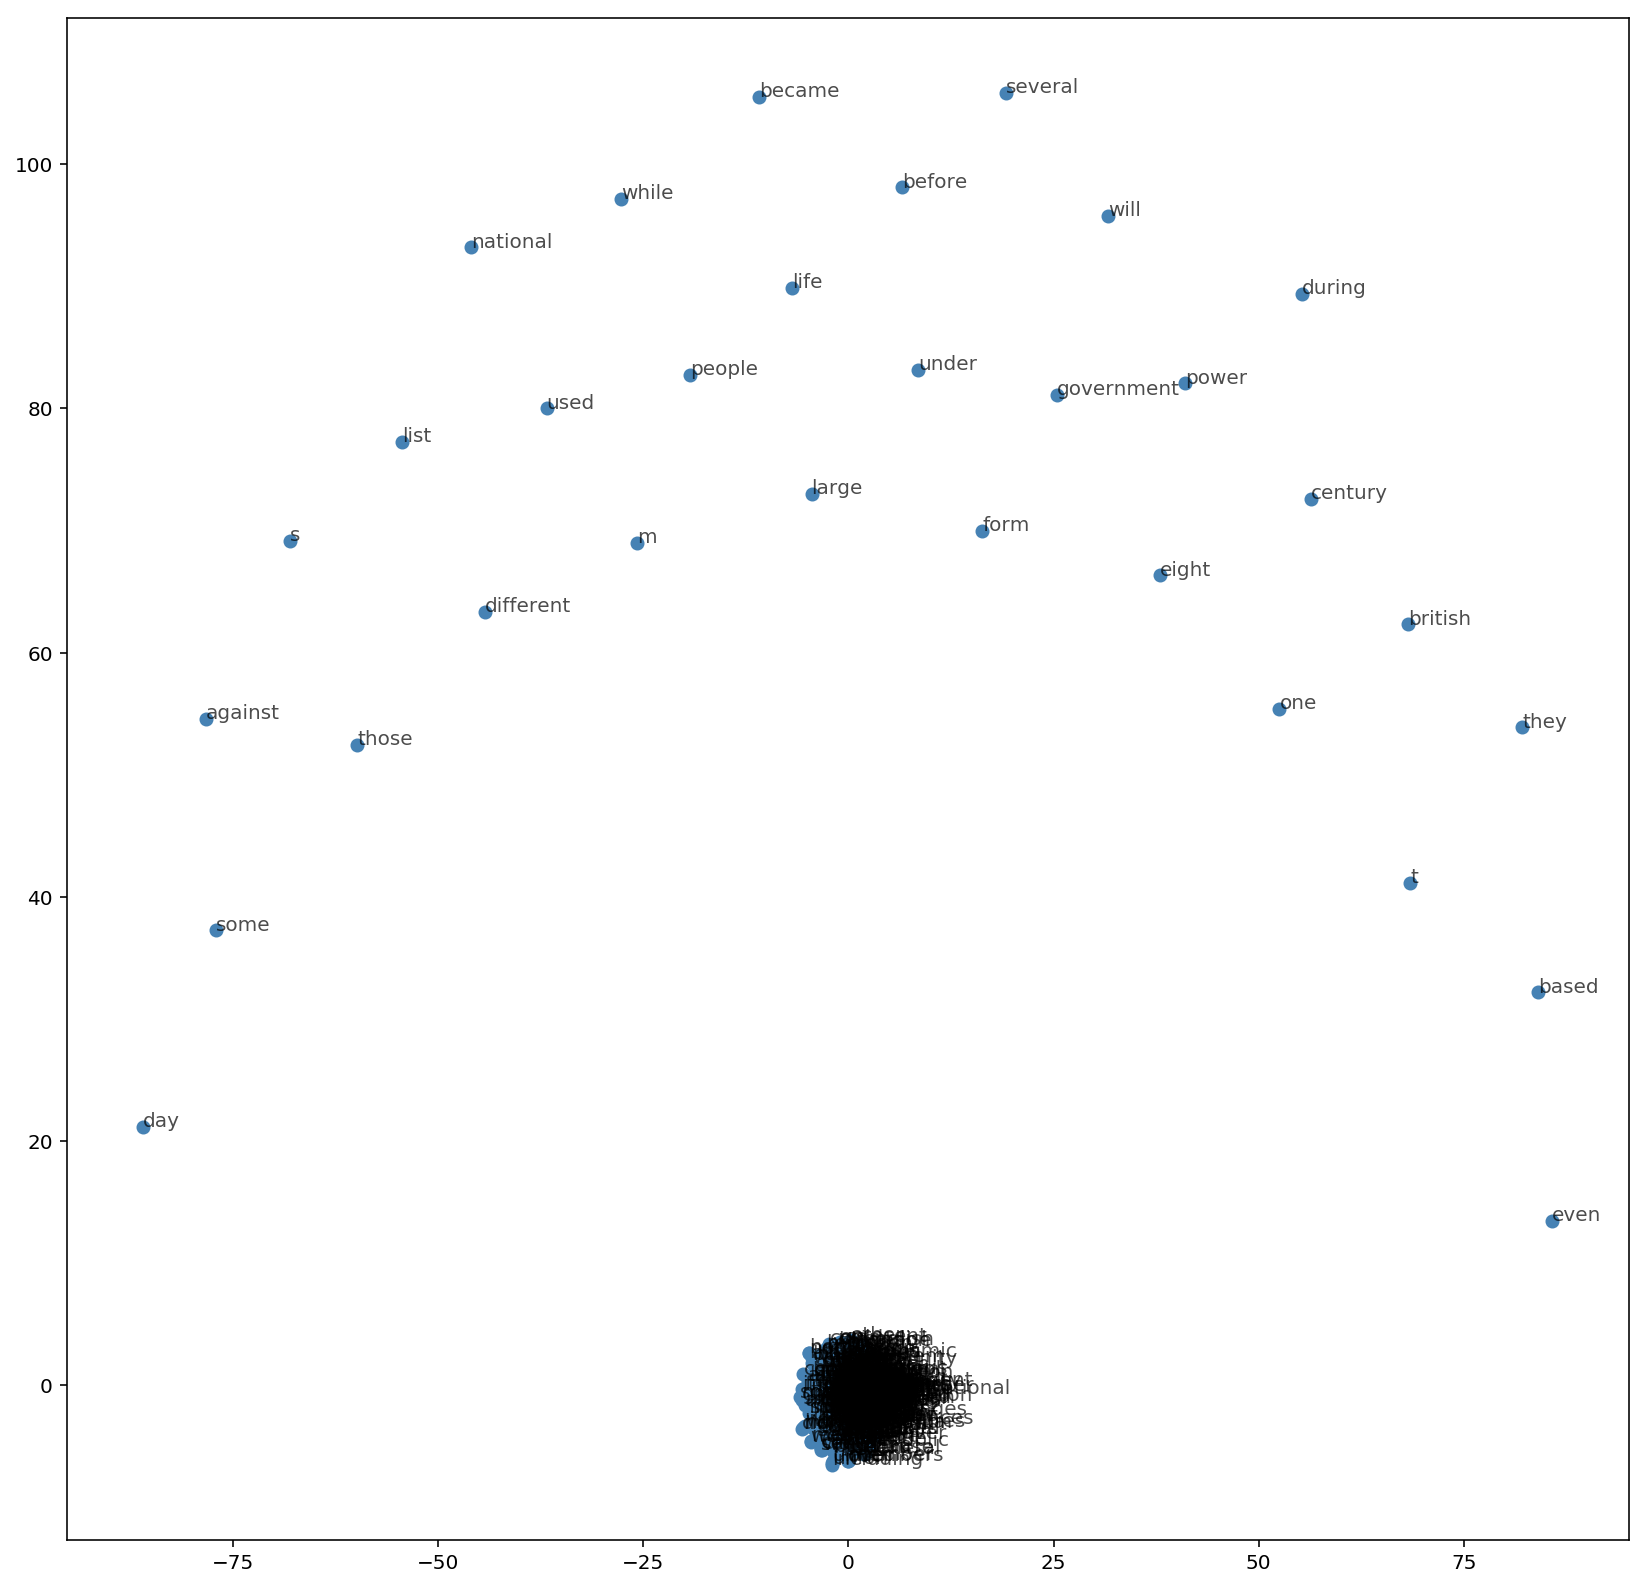

In [20]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)